In [1]:
import pandas as pd

df = pd.read_excel("preprocessed.xlsx")
columns_ignore = ["name", "released", "score", "votes", "gross", "same_year"]

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(
    columns_ignore,
    axis=1,
)
y = df["score"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
X.shape[1]

195

In [4]:
import sys

sys.getsizeof(X) / 1024**2

1.8902769088745117

# Models

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


def plot_predictions(y_test, y_pred):
    plt.scatter(y_test, y_pred, color="blue")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Predictions vs. Truth")
    plt.show()


def evaluate(model, X, y):
    pred = model.predict(X)
    print("Mean squared error: %.2f" % mean_squared_error(y, pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y, pred))
    print("Coefficient of determination: %.2f" % r2_score(y, pred))
    plot_predictions(y, pred)

## LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(X_train, y_train)

Mean squared error: 0.59
Mean absolute error: 0.58
Coefficient of determination: 0.37


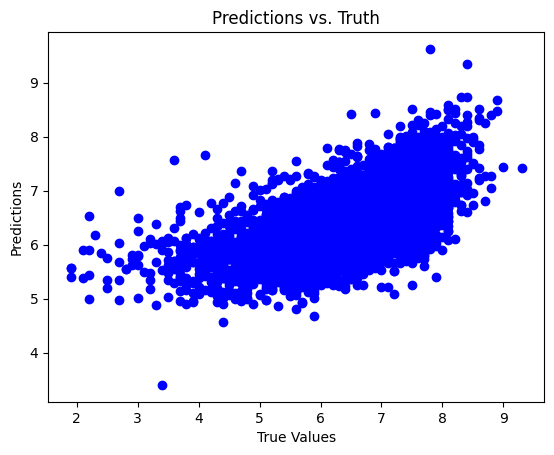

Mean squared error: 0.58
Mean absolute error: 0.59
Coefficient of determination: 0.36


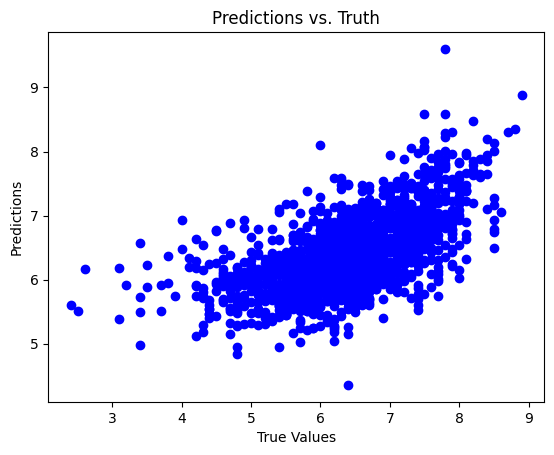

In [17]:
evaluate(linear_regressor, X_train, y_train)
evaluate(linear_regressor, X_test, y_test)

## DecisionTree

In [18]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=6)
decision_tree = decision_tree.fit(X_train, y_train)

Mean squared error: 0.63
Mean absolute error: 0.61
Coefficient of determination: 0.32


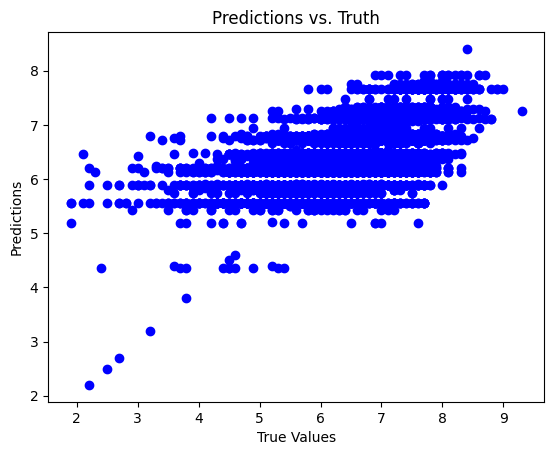

Mean squared error: 0.70
Mean absolute error: 0.64
Coefficient of determination: 0.23


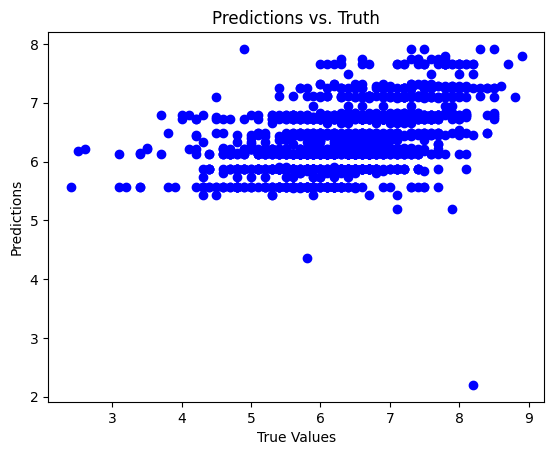

In [19]:
evaluate(decision_tree, X_train, y_train)
evaluate(decision_tree, X_test, y_test)

## Forest Regressor

In [20]:
# forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

Mean squared error: 0.08
Mean absolute error: 0.22
Coefficient of determination: 0.91


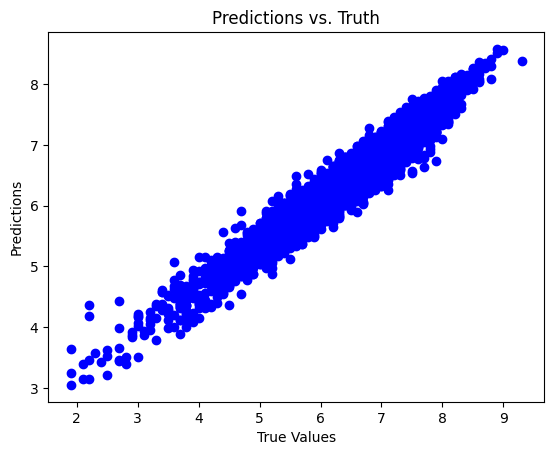

Mean squared error: 0.56
Mean absolute error: 0.58
Coefficient of determination: 0.38


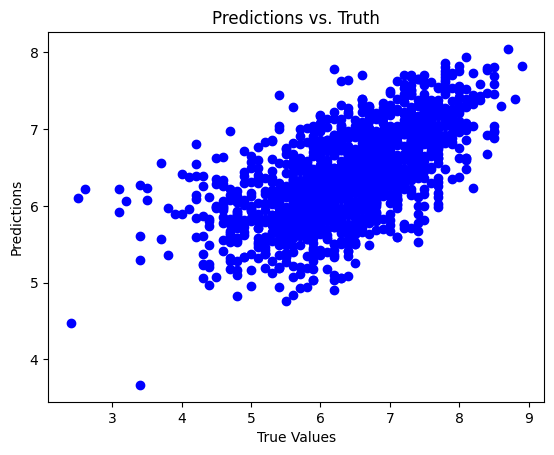

In [21]:
evaluate(forest, X_train, y_train)
evaluate(forest, X_test, y_test)

## Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor()
gradient_boosting = gradient_boosting.fit(X_train, y_train)

Mean squared error: 0.54
Mean absolute error: 0.56
Coefficient of determination: 0.42


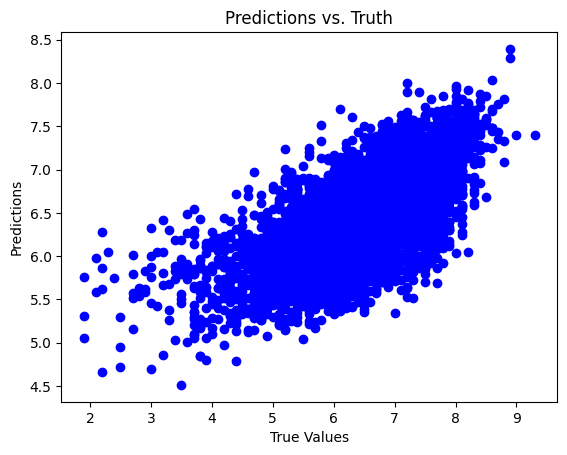

Mean squared error: 0.56
Mean absolute error: 0.58
Coefficient of determination: 0.38


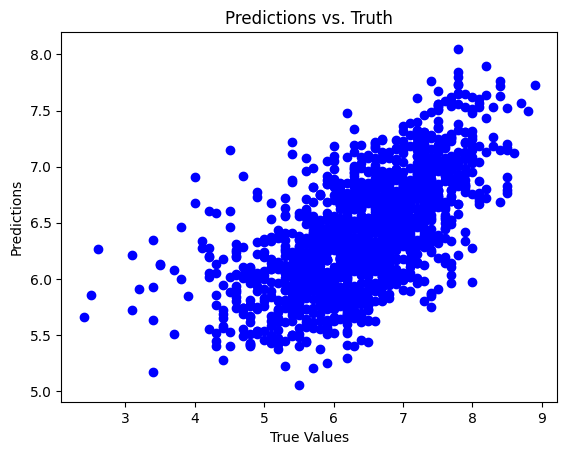

In [23]:
evaluate(gradient_boosting, X_train, y_train)
evaluate(gradient_boosting, X_test, y_test)

In [24]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=64,
    activation="logistic",
    solver="sgd",
    alpha=0,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=1000,
)
mlp = mlp.fit(X_train, y_train)

Mean squared error: 0.95
Mean absolute error: 0.77
Coefficient of determination: -0.02


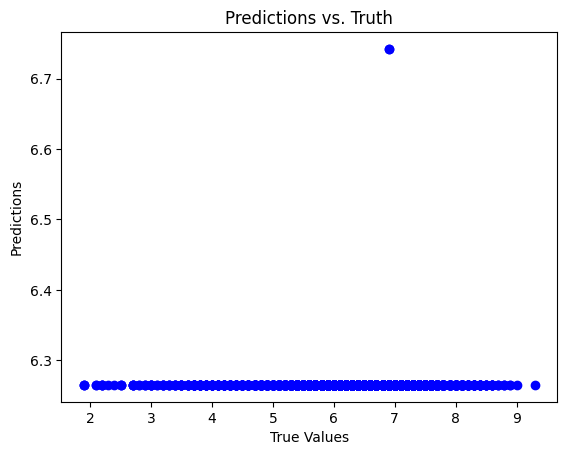

Mean squared error: 0.93
Mean absolute error: 0.77
Coefficient of determination: -0.02


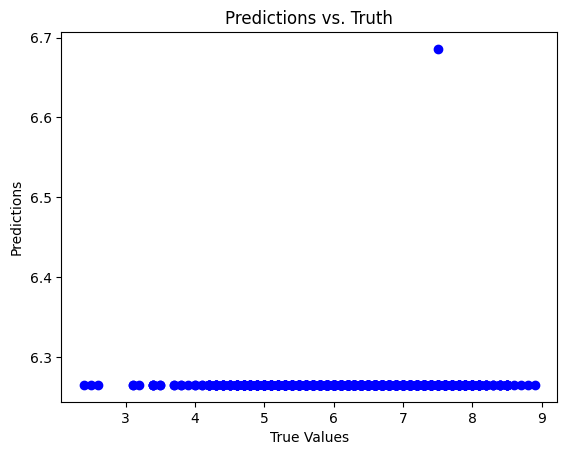

In [25]:
evaluate(mlp, X_train, y_train)
evaluate(mlp, X_test, y_test)

## KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn = knn.fit(X_train, y_train)

Mean squared error: 0.69
Mean absolute error: 0.64
Coefficient of determination: 0.26


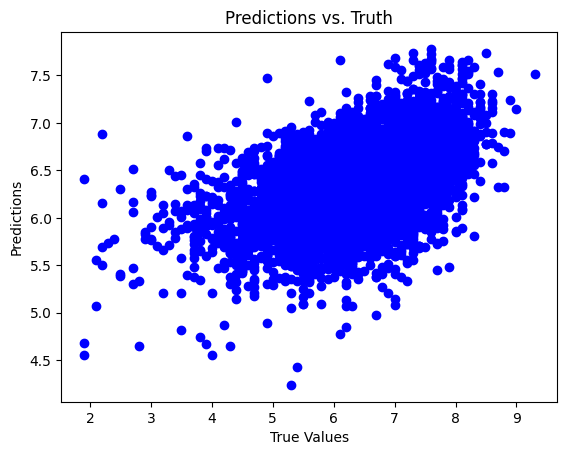

Mean squared error: 0.76
Mean absolute error: 0.68
Coefficient of determination: 0.16


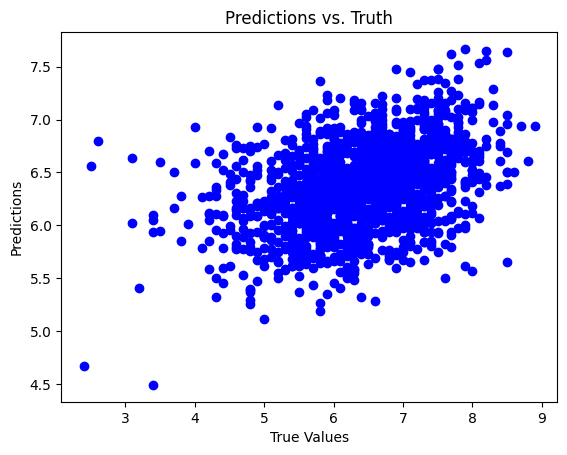

In [27]:
evaluate(knn, X_train, y_train)
evaluate(knn, X_test, y_test)

In [ ]:
# Ensemble
from sklearn.ensemble import VotingRegressor

reg1 = knn
reg2 = forest
reg3 = gradient_boosting
reg4 = linear_regressor
reg5 = decision_tree
reg6 = mlp


def weight(model):
    return 1 / mean_squared_error(model.predict(X_test), y_test)


ereg = VotingRegressor(
    estimators=[("knn", reg1), ("rf", reg2), ("gb", reg3), ("lr", reg4)],
    weights=[weight(reg1), weight(reg2), weight(reg3), weight(reg4)],
)
ereg = ereg.fit(X_train, y_train)

In [28]:
evaluate(ereg, X_train, y_train)
evaluate(ereg, X_test, y_test)

NameError: name 'ereg' is not defined

In [ ]:
# Ensemble
from sklearn.ensemble import StackingRegressor

reg1 = knn
reg2 = forest
reg3 = gradient_boosting
reg4 = linear_regressor
reg5 = decision_tree
reg6 = mlp

stack = StackingRegressor(
    estimators=[("knn", reg1), ("rf", reg2), ("gb", reg3), ("lr", reg4)],
    final_estimator=MLPRegressor(
        hidden_layer_sizes=64,
        activation="logistic",
        solver="sgd",
        alpha=0,
        batch_size=1,
        learning_rate_init=0.01,
        shuffle=True,
        momentum=0,
        n_iter_no_change=50,
        max_iter=1000,
    ),
)
stack = stack.fit(X_train, y_train)

Mean squared error: 0.45
Coefficient of determination: 0.52


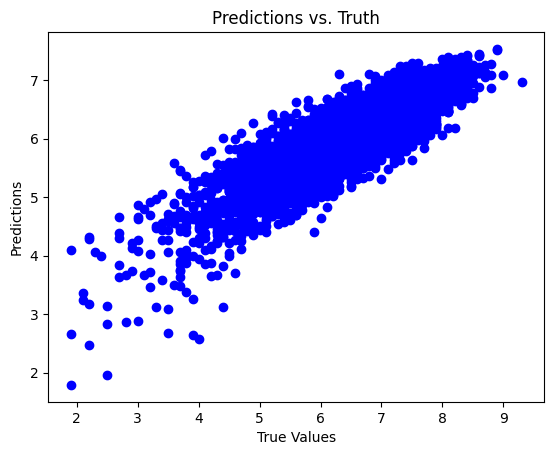

Mean squared error: 0.69
Coefficient of determination: 0.25


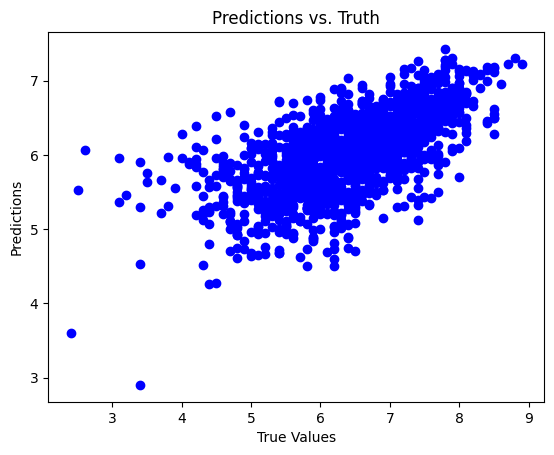

In [ ]:
evaluate(stack, X_train, y_train)
evaluate(stack, X_test, y_test)